In [1]:
import urbangrammar_graphics as ugg

import os
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
from random import shuffle
import contextily as ctx

## 默认色系

In [2]:
colors = ugg.COLORS

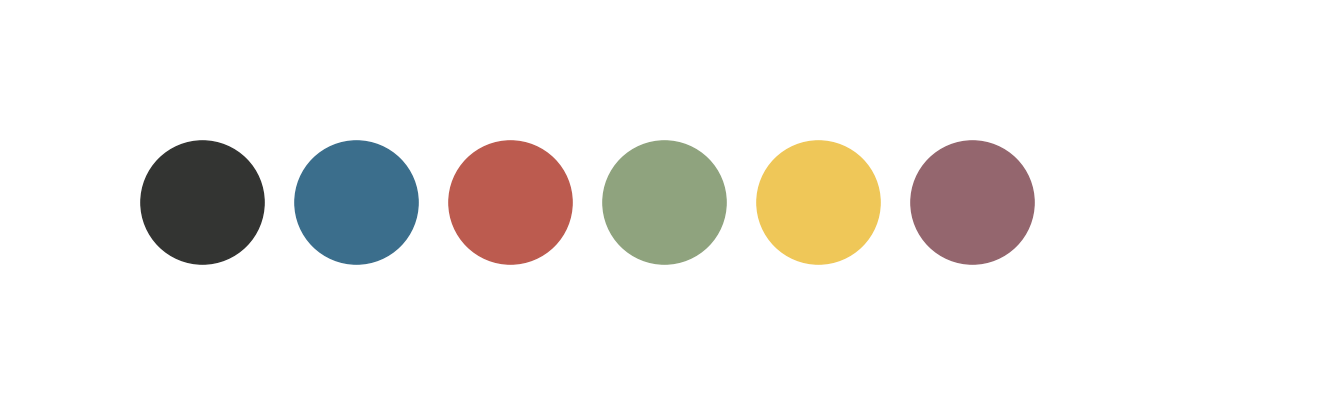

In [3]:
fig, ax = plt.subplots(figsize=(20, 5))
for i, c in enumerate(colors):
    ax.add_artist(plt.Circle((i, 0), 0.4, color=c))    
    ax.set_axis_off()
    ax.set_aspect(1)
    plt.xlim(-1.25,7.25)
    plt.ylim(-1.25,1.25)

### 顺序调色板

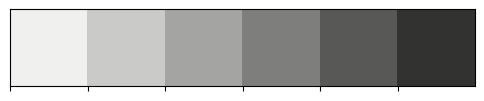

In [4]:
sns.palplot(sns.light_palette(colors[0]))

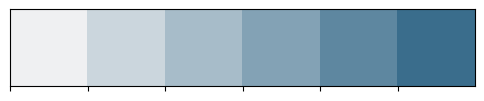

In [5]:
sns.palplot(sns.light_palette(colors[1]))

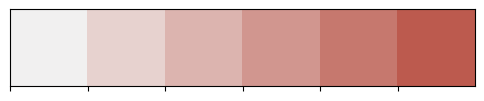

In [6]:
sns.palplot(sns.light_palette(colors[2]))

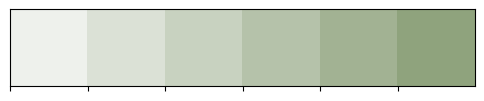

In [7]:
sns.palplot(sns.light_palette(colors[3]))

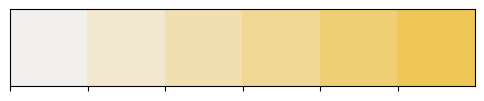

In [8]:
sns.palplot(sns.light_palette(colors[4]))

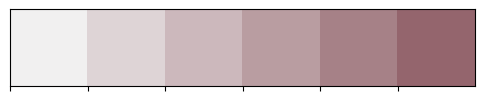

In [9]:
sns.palplot(sns.light_palette(colors[5]))

### 离散

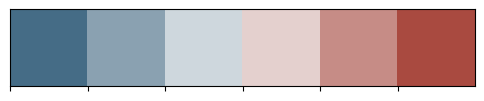

In [10]:
sns.palplot(ugg.DIVERGING)

### 非饱和

In [11]:
desaturated = sns.color_palette(colors, desat=0)

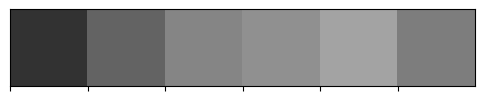

In [12]:
sns.palplot(desaturated)

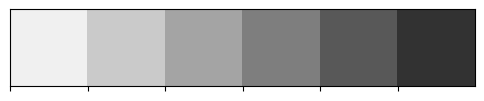

In [13]:
sns.palplot(sns.color_palette(sns.light_palette(colors[0]), desat=0))

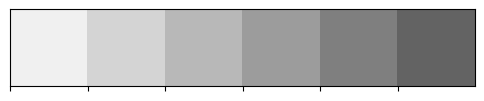

In [14]:
sns.palplot(sns.color_palette(sns.light_palette(colors[1]), desat=0))

### 转 matplotlib

In [15]:
cmap = sns.light_palette(colors[1], as_cmap=True, n_colors=10)

In [16]:
cmap = ugg.CMAP

## 绘制地图

<Axes: >

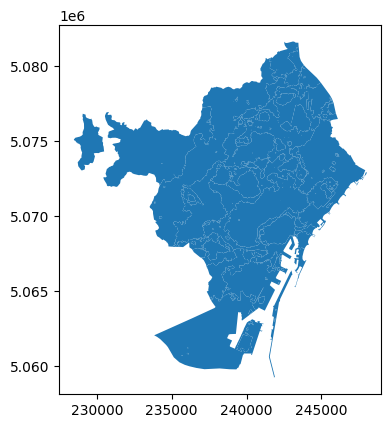

In [17]:
gdf = gpd.read_parquet("data/bcn_ss.pq")
gdf = gdf.to_crs(3857)
gdf.plot()

<Axes: >

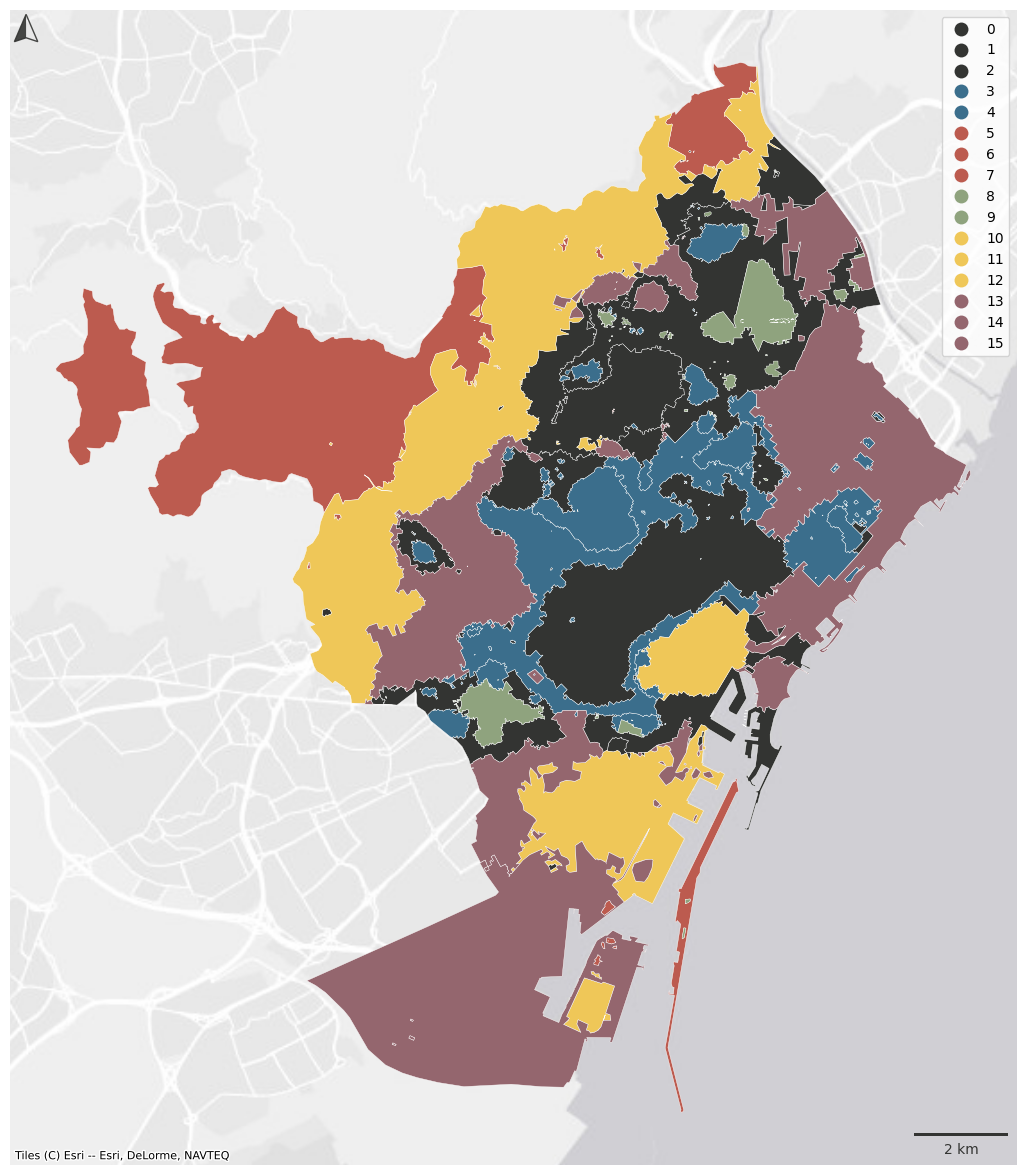

In [ ]:
ax = gdf.plot('cluster', categorical=True, legend=True, figsize=(15, 15), cmap=cmap, zorder=1, linewidth=.3, edgecolor='w', alpha=1)

# 需要mapbox token
# ctx.add_basemap(ax, crs=gdf.crs, source=ugg.get_tiles('roads', token), zorder=2, alpha=.3)
# ctx.add_basemap(ax, crs=gdf.crs, source=ugg.get_tiles('labels', token), zorder=3, alpha=1)
# ctx.add_basemap(ax, crs=gdf.crs, source=ugg.get_tiles('background', token), zorder=-1, alpha=1)

ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.Esri.WorldGrayCanvas)
ax.set_axis_off()

scalebar = ScaleBar(dx=1,
                    color=colors[0],
                    location='lower right',
                    height_fraction=0.002,
                    pad=.5,
                    frameon=False,
                    )
ax.add_artist(scalebar)

ugg.north_arrow(plt.gcf(), ax, 0, size=.026, linewidth=1, color=colors[0], loc="upper left", pad=.002, alpha=.9)